<a href="https://colab.research.google.com/github/Amaliaaap/Machine-Learning/blob/main/Loan%20Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BUILDING, TUNING, AND DEPLOYING MODELS**

by = Dian Amalia Putri  

---



# **1. Eksplorasi Data**

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv('/content/drive/MyDrive/ML/loan_approval_dataset.csv')
df.head()

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval
0,56,24000,PhD,333,26892,Personal,0
1,46,90588,Master,316,26619,Home,1
2,32,113610,PhD,452,1281,Personal,1
3,60,117856,High School,677,28420,Personal,0
4,25,58304,PhD,641,16360,Car,0


In [100]:
df.tail()

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval
495,37,108236,High School,455,44668,Education,1
496,41,117579,Bachelor,666,24177,Car,1
497,29,26469,PhD,550,25022,Medical,0
498,52,50105,High School,633,41761,Medical,0
499,50,62101,Bachelor,810,6542,Home,1


In [101]:
df.shape

(500, 7)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              500 non-null    int64 
 1   Income           500 non-null    int64 
 2   Education_Level  500 non-null    object
 3   Credit_Score     500 non-null    int64 
 4   Loan_Amount      500 non-null    int64 
 5   Loan_Purpose     500 non-null    object
 6   Loan_Approval    500 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 27.5+ KB


In [103]:
df.isnull().sum()

,0
Age,0
Income,0
Education_Level,0
Credit_Score,0
Loan_Amount,0
Loan_Purpose,0
Loan_Approval,0


Dalam data tersebut tidak terdapat missing value

**Visualisasi data**

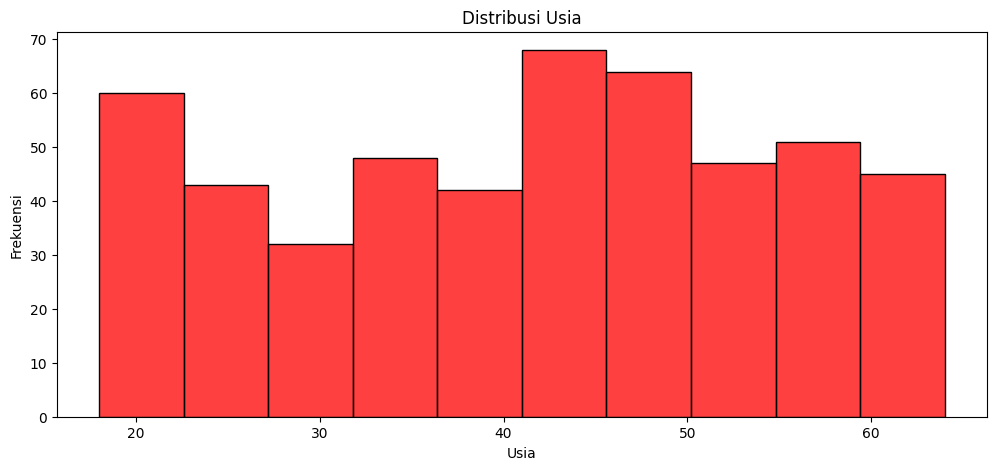

In [104]:
plt.figure(figsize=(12,5))
sns.histplot(df['Age'], bins=10, color='red')
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

Berdasarkan plot di atas, sebaran usia tidak mengikuti distribusi normal. Usia sekitar 40-an memiliki frekuensi tertinggi. Kelompok usia 30-an memiliki frekuensi lebih rendah dibandingkan kelompok usia lainnya.

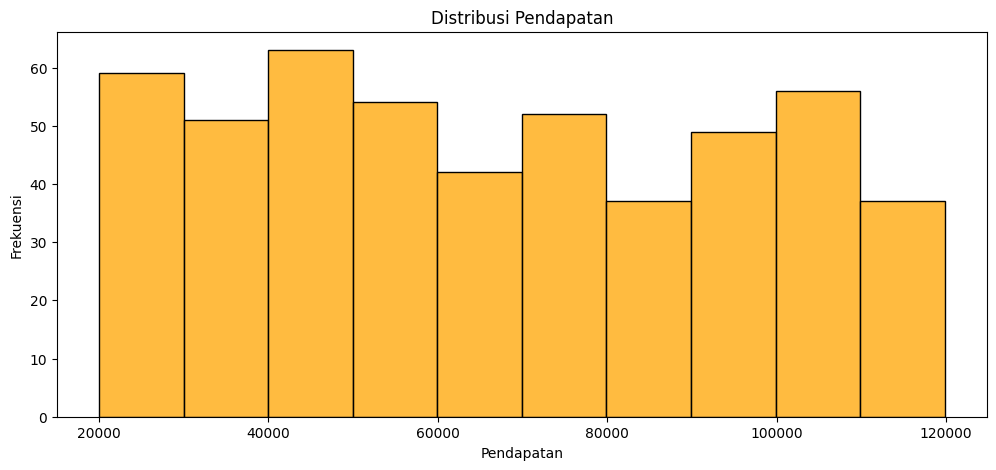

In [105]:
plt.figure(figsize=(12,5))
sns.histplot(df['Income'], bins=10, color= 'orange')
plt.title('Distribusi Pendapatan')
plt.xlabel('Pendapatan')
plt.ylabel('Frekuensi')
plt.show()

Berdasarkan plot di atas, pendapatan pemohon cukup bervariasi dan tersebar cukup merata, meskipun ada beberapa kelompok pendapatan yang lebih dominan. Pendapatan sekitar 40.000-50.000 memiliki frekuensi tertinggi dan kelompok pendapatan 80.000-90.000 memiliki frekuensi lebih rendah.

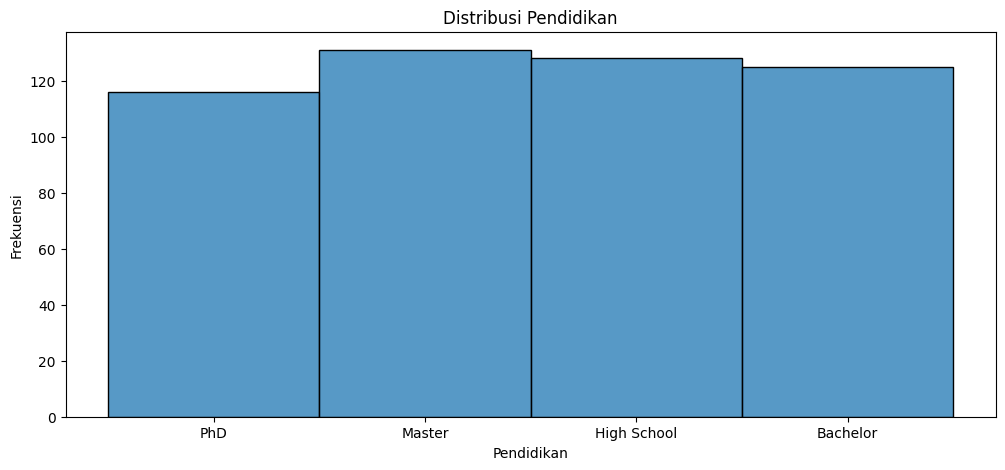

In [106]:
plt.figure(figsize=(12,5))
sns.histplot(df['Education_Level'], bins=10)
plt.title('Distribusi Pendidikan')
plt.xlabel('Pendidikan')
plt.ylabel('Frekuensi')
plt.show()

Berdasarkan plot di atas, distribusi pendidikan pemohon cukup seimbang tanpa ada perbedaan yang terlalu signifikan antar kategori pendidikan.

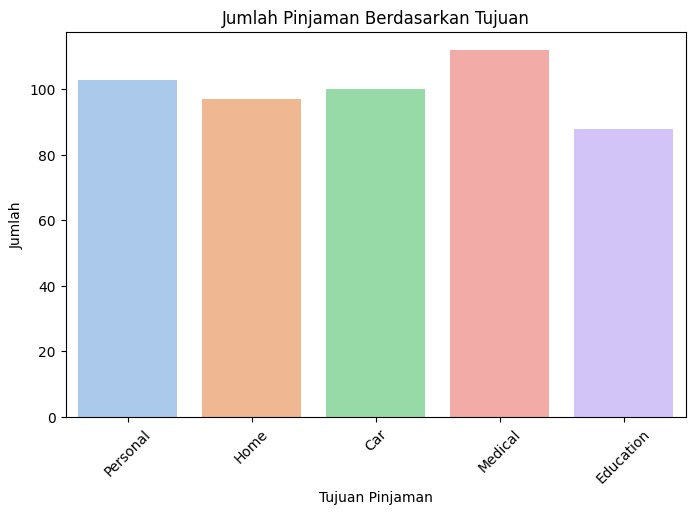

In [108]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Loan_Purpose", hue= 'Loan_Purpose', data=df, palette="pastel")
plt.title("Jumlah Pinjaman Berdasarkan Tujuan")
plt.xlabel("Tujuan Pinjaman")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

Berdasarkan plot di atas, pinjaman untuk kebutuhan medis paling banyak diajukan, hal ini menunjukkan bahwa banyak orang membutuhkan bantuan keuangan untuk biaya pengobatan atau layanan kesehatan. Sedangkan, pinjaman untuk pendidikan paling sedikit, hal ini mengindikasikan bahwa lebih sedikit individu yang mengajukan pinjaman untuk biaya pendidikan, atau ada sumber pendanaan lain yang tersedia. Pinjaman personal, rumah, dan kendaraan memiliki jumlah yang cukup seimbang, hal ini menunjukkan bahwa banyak orang menggunakan pinjaman untuk kebutuhan konsumtif dan investasi properti atau kendaraan.

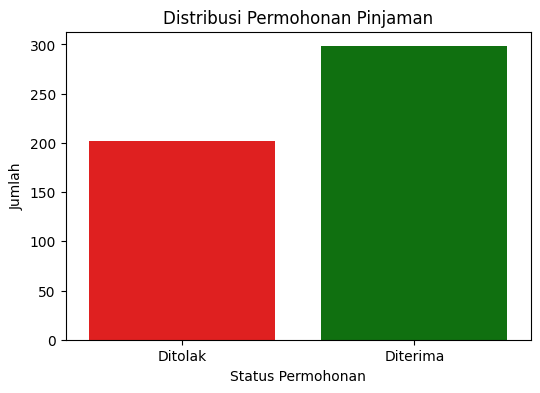

In [211]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="Loan_Approval", hue="Loan_Approval", data=df, palette=['red', 'green'], legend=False)
plt.xticks(ticks=[0, 1], labels=["Ditolak", "Diterima"])
plt.title('Distribusi Permohonan Pinjaman')
plt.xlabel('Status Permohonan')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan plot di atas, dalam dataset ini lebih banyak permohonan yang diterima dibandingkan yang ditolak. Perbedaan antara jumlah permohonan yang diterima dan ditolak cukup signifikan.

# **2. Pemrosesan Data**

In [109]:
df.dtypes

,0
Age,int64
Income,int64
Education_Level,object
Credit_Score,int64
Loan_Amount,int64
Loan_Purpose,object
Loan_Approval,int64


**Encoding pada fitur kategorikal**

In [110]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_labels = le.fit_transform(df['Education_Level'])
le_labels = le.fit_transform(df['Loan_Purpose'])
df['Education_Level']=le_labels
df['Loan_Purpose']=le_labels

In [111]:
df.head()

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval
0,56,24000,4,333,26892,4,0
1,46,90588,2,316,26619,2,1
2,32,113610,4,452,1281,4,1
3,60,117856,4,677,28420,4,0
4,25,58304,0,641,16360,0,0


**Feature scaling pada fitur numerik**

In [112]:
from sklearn.preprocessing import StandardScaler
cols = ['Age', 'Income', 'Credit_Score', 'Loan_Amount']
scaler = StandardScaler()
df[cols]=scaler.fit_transform(df[cols])

df.head()

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval
0,1.100655,-1.496205,4,-1.500286,0.026245,4,0
1,0.353029,0.809486,2,-1.606833,0.006629,2,1
2,-0.693647,1.606651,4,-0.754461,-1.813972,4,1
3,1.399705,1.753674,4,0.655712,0.136035,4,0
4,-1.216985,-0.308387,0,0.430084,-0.730507,0,0


**Membagi dataset menjadi training set (80%) dan testing set (20%)**

In [113]:
x = df.drop('Loan_Approval', axis=1)
y = df['Loan_Approval']
y

,Loan_Approval
0,0
1,1
2,1
3,0
4,0
...,...
495,1
496,1
497,0
498,0


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# **3. Pemilihan dan Training Model**

**a. Logistic Regression**

In [196]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

**b. Decision Tree**

In [195]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt =dt.predict(x_test)
acc_dt =  accuracy_score(y_test, y_pred_dt)

**c. Random Forest**

In [194]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf =rf.predict(x_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

**d. Gradient Boosting**

In [193]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
acc_gb = accuracy_score(y_test, y_pred_gb)

**e. Naive Bayes**

In [192]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

**f. K-Nearest Neighbors**

In [188]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

In [212]:
print('='*50)
print('PERBANDINGAN AKURASI MODEL')
print('='*50)

df_perbandingan = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest','Gradient Boosting','Naive Bayes','K-Nearest Neighbors'],
    'Akurasi':[acc_lr, acc_dt,acc_rf, acc_gb, acc_nb ,acc_knn]
})

print(df_perbandingan)

PERBANDINGAN AKURASI MODEL
                 Model  Akurasi
0  Logistic Regression     0.63
1        Decision Tree     0.53
2        Random Forest     0.45
3    Gradient Boosting     0.47
4          Naive Bayes     0.57
5  K-Nearest Neighbors     0.49


Berdasarkan hasil training model di atas, Logistic Regression (0,63) dan Naive Bayes (0,57) memiliki nilai akurasi yang tinggi dibandingkan model lain. Dengan akurasi yang tinggi, model ini memberikan performa terbaik dibandingkan model lain dalam dataset ini.

# **4. Evaluasi Model**

In [121]:
from sklearn.metrics import classification_report

In [122]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

In [123]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

In [124]:
print('='*50)
print('PERBANDINGAN MATRIKS EVALUASI')
print('='*50)

y_pred_lr = lr.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print('-'*50)

y_pred_nb = nb.predict(x_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

print('-'*50)

PERBANDINGAN MATRIKS EVALUASI
Logistic Regression Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.50      0.03      0.05        37
           1       0.63      0.98      0.77        63

    accuracy                           0.63       100
   macro avg       0.57      0.51      0.41       100
weighted avg       0.58      0.63      0.50       100

--------------------------------------------------
Naive Bayes Accuracy: 0.57
              precision    recall  f1-score   support

           0       0.12      0.03      0.04        37
           1       0.61      0.89      0.72        63

    accuracy                           0.57       100
   macro avg       0.37      0.46      0.38       100
weighted avg       0.43      0.57      0.47       100

--------------------------------------------------


# **5. Tuning Model dengan Grid Search atau Random Search**

In [125]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [203]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(x_train, y_train)

best_params_lr = grid_search_lr.best_params_
best_model = grid_search_lr.best_estimator_
y_pred_tun_lr = best_model.predict(x_test)

print("Best Hyperparameters:", best_params_lr)
acc_tun_lr = accuracy_score(y_test, y_pred_tun_lr)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [204]:
param_grid_nb = {
    'alpha': [0.01, 0.1, 0.5, 1, 5, 10],
    'binarize': [0.0, 0.5, 1.0],
}

grid_search_nb = GridSearchCV(estimator=BernoulliNB(), param_grid=param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(x_train, y_train)

best_params_nb = grid_search_nb.best_params_
best_model = grid_search_nb.best_estimator_
y_pred_tun_nb = best_model.predict(x_test)

print("Best Hyperparameters:", best_params_nb)
acc_tun_nb = accuracy_score(y_test, y_pred_tun_nb)

Best Hyperparameters: {'alpha': 0.01, 'binarize': 1.0}


# **6. Perbandingan performa sebelum dan sesudah tuning**

In [214]:
print('='*50)
print("PERBANDINGAN PERFORMA SEBELUM & SESUDAH TUNING")
print('='*50)

result_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Naïve Bayes"],
    "Akurasi Sebelum Tuning": [acc_lr, acc_nb],
    "Akurasi Sesudah Tuning": [acc_tun_lr, acc_tun_nb]
})

print(result_df)


PERBANDINGAN PERFORMA SEBELUM & SESUDAH TUNING
                 Model  Akurasi Sebelum Tuning  Akurasi Sesudah Tuning
0  Logistic Regression                    0.63                    0.64
1          Naïve Bayes                    0.57                    0.61


**Kesimpulan**:

1. Pada Logistic regression, tuning hyperparameter seperti C dan penalty memberikan sedikit peningkatan performa. Hal ini menunjukkan bahwa model sudah cukup baik sebelum tuning dan tuning memperbaiki sedikit performa.  

2. Pada Naive Bayes, tuning alpha dan binarize memberikan peningkatan akurasi yang lebih signifikan dibanding logistic regression.